In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import math
from sklearn import preprocessing
from collections import Counter
import pickle
import seaborn as sns # corr

In [2]:
os.chdir('/Users/Sean/Desktop/DS1003_Final_Project/data')

In [3]:
listings_all = pd.read_csv('listings_all.csv',encoding = "ISO-8859-1")
pkl_file = open('df.p', 'rb')
df_pkl = pickle.load(pkl_file)
df_pkl = pd.DataFrame(df_pkl)

In [4]:
pdf = df_pkl.copy()
df = listings_all.copy()

In [5]:
binary_cols = ['host_is_superhost', 'instant_bookable']
cat_cols = ['host_response_time', 'zipcode', 'property_type', 'room_type',
            'bed_type', 'cancellation_policy']
text_cols = ['name', 'summary', 'space', 'description', 'neighborhood_overview',
             'transit', 'access', 'interaction', 'house_rules', 'host_about']
num_cols = ['host_response_rate', 'host_listings_count', 'extra_people',
            'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
            'minimum_nights', 'maximum_nights', 'calculated_host_listings_count', 'longitude', 'latitude']
mix_cols = ['host_verifications', 'amenities']
Y = ['price']

#####################################################################

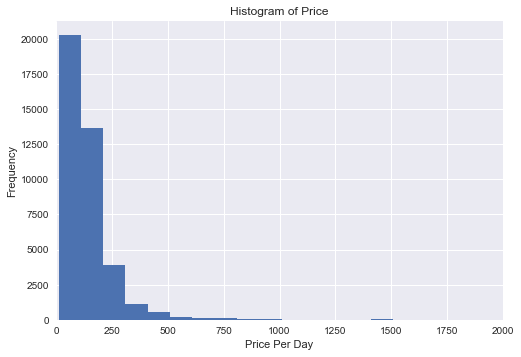

In [6]:
# visualize distribution of price (target variable)
plt.hist(df['price'], bins=100)
plt.title("Histogram of Price")
plt.xlabel("Price Per Day")
plt.ylabel("Frequency")
plt.xlim(0, 2000)
plt.show()

In [7]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

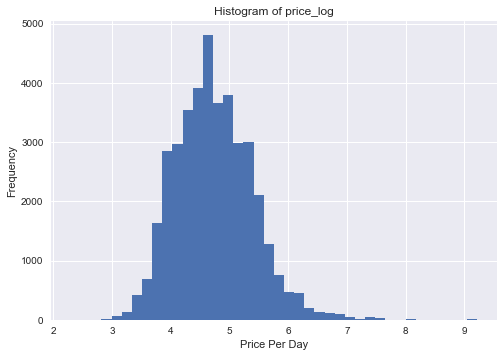

In [8]:
plt.hist(df['price_log'], bins=40)
plt.title("Histogram of price_log")
plt.xlabel("Price Per Day")
plt.ylabel("Frequency")
plt.show()

In [9]:
# extreame large price
np.unique(df['price'])[-20:]

array([2800, 3000, 3150, 3300, 3400, 3500, 3750, 4500, 4700, 5000, 5999,
       6000, 6200, 6500, 8000, 9000, 9211, 9900, 9998, 9999])

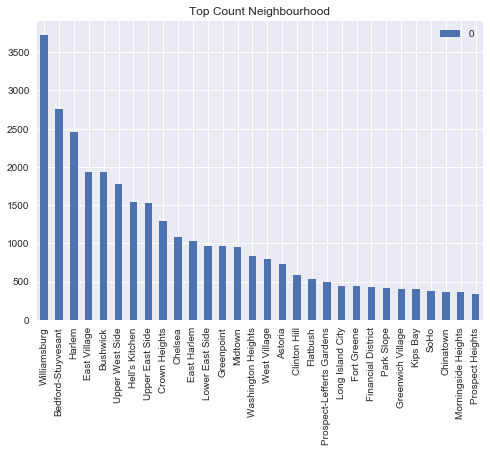

In [11]:
nb_counts = Counter(df.neighbourhood_cleansed)
tmp = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0,ascending=False)
tmp = tmp.head(30)
tmp.plot(kind='bar')
plt.title('Top Count Neighbourhood')

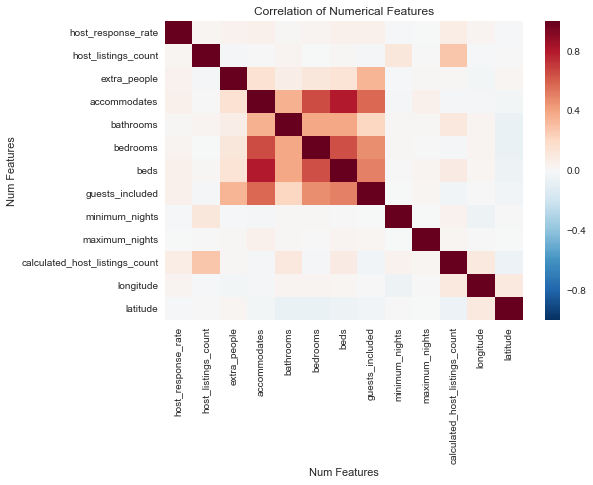

In [12]:
df_num = df[num_cols]
df_num = df_num.dropna()
corr_matrix = np.corrcoef(df_num.T)
corr_df_num = pd.DataFrame(data = corr_matrix,columns=df_num.columns, index=df_num.columns)
sns.heatmap(corr_df_num, 
            xticklabels=True,
            yticklabels=True)
plt.xlabel('Num Features')
plt.ylabel('Num Features')
plt.title('Correlation of Numerical Features')